In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("lab00_demo_distribution.ipynb")

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time

# Magic command to display plots in the notebook
%matplotlib inline

# Set seed for reproducibility
np.random.seed(42)


# DSAI5207: Deep Learning - Assignment 0 (Demo)

**Welcome to DSAI5207!** 👋

This is a **sample lab** designed to help you warm up for the semester. It serves two purposes:
1.  **Refresher:** We review the core NumPy logic for **Linear Regression** and **Logistic Regression**.
2.  **Workflow Demo:** This notebook demonstrates exactly how assignments in this course work, how to edit them, and how to submit them.

---

## 📝 How to Complete This Assignment

This assignment is distributed as a **Jupyter Notebook (`.ipynb`)**. Your task is to implement the missing logic in specific code cells.

### 1. Where to Write Code
In every question, you will see a function definition. You must write your code **between** the `# BEGIN SOLUTION` and `# END SOLUTION` comments.

**Example:**
```python
def add(a, b):
    # BEGIN SOLUTION
    return a + b  <-- YOUR CODE GOES HERE
    # END SOLUTION
```

### 2. Automatic Grading (Otter-Grader) 🦦
We use an auto-grader. After every question, there is a cell labelled `Type: Test` or containing `assert` statements.
* **Run these cells** to check your work immediately.
* If the cell runs without error, your solution is likely correct!

### 3. Important Rules ⚠️
* **DO NOT** modify the test cells.
* **DO NOT** change the function names or arguments.
* **DO NOT** delete any cells or change the structure of the notebook.
* **ONLY** edit the code between the solution markers.

---

## 📮 Submission Instructions

Once you have finished the assignment and all tests pass:

1.  **Rename the file:** Change the filename to match the format `{STUDENT_ID}_A0.ipynb`.
    * *Example:* If your ID is `24151913r`, your file should be named **`24151913r_A0.ipynb`**.
2.  **Submit:** Upload your renamed `.ipynb` file to **Learn@PolyU**.

**Let's get started building your first Neural Network layers!** 🚀


# Part 1: Linear Regression (The Basics)

Before we solve anything, we need to define **the model** (how we predict) and **the loss** (how we measure error).

**Equation:**

$$ \hat{y} = XW + b $$


## Question 1: The Linear Forward Pass

We have a matrix of inputs $X$ (shape `N, D`) and weights $W$ (shape `D, 1`) and bias $b$.

**Task:** Implement `linear_forward(X, W, b)` using Matrix Multiplication (`@`) and Broadcasting.


In [3]:
def linear_forward(X, W, b):
    """
    Computes y = XW + b
    """
    # BEGIN SOLUTION
    return X @ W + b
    # END SOLUTION


In [4]:
grader.check("q1")

q1 results: All test cases passed!

## Question 2: How wrong are we? (MSE Loss)

To train a model, we need to know how bad our predictions are. For regression, we use **Mean Squared Error**.

$$ MSE = \frac{1}{N} \sum_{i=1}^{N} (y_{pred}^{(i)} - y_{true}^{(i)})^2 $$

**Task:** Implement `mse_loss(y_pred, y_true)`.


In [5]:
def mse_loss(y_pred, y_true):
    # BEGIN SOLUTION
    return 0.5 * np.mean((y_pred - y_true)**2)
    # END SOLUTION


# Part 2: Solving Linear Regression (Matrix Inversion)

While modern Deep Learning uses Gradient Descent, Linear Regression has a beautiful "Closed Form" solution. We can find the **perfect** $W$ in one step using Matrix Algebra!

This is known as the **Normal Equation**:

$$ W = (X^T X)^{-1} X^T y $$

**Where:**

* $X^T$ is the transpose of $X$.
* $^{-1}$ is the matrix inverse.


## Question 3: The Normal Equation

**Task:** Implement `solve_linear_regression(X, y)` to calculate $W$ using the formula above.

**Helpful NumPy functions:**
* Matrix Multiplication: `A @ B` or `np.dot(A, B)`
* Transpose: `X.T`
* Inverse: `np.linalg.inv(A)`


In [6]:
def solve_linear_regression(X, y):
    """
    Computes W using the Normal Equation: W = (X^T X)^-1 X^T y
    Arguments:
        X: (N, D) matrix of inputs
        y: (N, 1) vector of targets
    Returns:
        W: (D, 1) vector of weights
    """
    # BEGIN SOLUTION
    # 1. Compute X transpose
    Xt = X.T
    
    # 2. Compute (X^T X)
    XtX = Xt @ X
    
    # 3. Compute Inverse of (X^T X)
    XtX_inv = np.linalg.inv(XtX)
    
    # 4. Compute final result: Inverse @ X^T @ y
    return XtX_inv @ Xt @ y
    # END SOLUTION


In [7]:
grader.check("q3")

q3 results: All test cases passed!

Model found: y = 4.22 + 2.77x


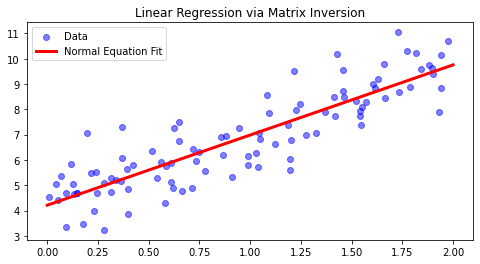

In [8]:
# 📉 DEMO: The Perfect Line
# Let's generate noisy data and use your Matrix Inversion solver to fit it.

# 1. Generate Data (y = 4x + Noise)
X_demo = 2 * np.random.rand(100, 1)
y_demo = 4 + 3 * X_demo + np.random.randn(100, 1)

# Add bias term (column of 1s) to X manually so we can use matrix math
X_b = np.c_[np.ones((100, 1)), X_demo] 

# 2. Solve using YOUR function
theta_best = solve_linear_regression(X_b, y_demo)

print(f"Model found: y = {theta_best[0][0]:.2f} + {theta_best[1][0]:.2f}x")

# 3. Plot
plt.figure(figsize=(8, 4))
plt.scatter(X_demo, y_demo, color='blue', alpha=0.5, label='Data')
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
plt.plot(X_new, y_predict, "r-", linewidth=3, label="Normal Equation Fit")
plt.legend()
plt.title("Linear Regression via Matrix Inversion")
plt.show()


# Part 3: Logistic Regression (Gradient Descent)

For Logistic Regression (classifying Yes/No), there is **no** closed-form solution like the Normal Equation. We cannot just invert a matrix to find the answer.

Instead, we use **Gradient Descent**. We calculate the error, find the slope (gradient), and nudge the weights in the opposite direction.

**Key Formulas:**

1.  **Prediction:** $\hat{y} = \sigma(XW + b)$
2.  **Gradient (Slope):** $dW = \frac{1}{N} X^T (\hat{y} - y)$
3.  **Update Rule:** $W_{new} = W_{old} - \alpha \cdot dW$


## Question 4: The Activation (Sigmoid)

First, we need the sigmoid function to squash our outputs between 0 and 1.

$$ \sigma(x) = \frac{1}{1 + e^{-x}} $$

**Task:** Implement `sigmoid(x)`.


In [9]:
def sigmoid(x):
    # BEGIN SOLUTION
    return 1 / (1 + np.exp(-x))
    # END SOLUTION


## Question 5: Compute Gradients

To train the model, we first need to know which direction to move. We calculate the gradient (slope) of the loss with respect to weights ($dW$) and bias ($db$).

$$ dW = \frac{1}{N} X^T (\hat{y} - y) $$
$$ db = \frac{1}{N} \sum (\hat{y} - y) $$

**Task:** Implement `compute_gradients(X, y, W, b)`.
1.  Compute forward pass prediction: `y_hat = sigmoid(X @ W + b)`.
2.  Compute error: `error = y_hat - y`.
3.  Compute `dW` and `db` using the formulas above.


In [10]:
def compute_gradients(X, y, W, b):
    N = X.shape[0]
    # BEGIN SOLUTION
    # 1. Forward Pass
    z = X @ W + b
    y_hat = sigmoid(z)
    
    # 2. Error
    error = y_hat - y
    
    # 3. Gradients
    dW = (1/N) * (X.T @ error)
    db = (1/N) * np.sum(error)
    return dW, db
    # END SOLUTION


In [11]:
grader.check("q5")

q5 results: All test cases passed!

## Question 6: Update Parameters

Now that we have the gradients, we update the weights to move **opposite** to the error.

$$ W_{new} = W - \alpha \cdot dW $$
$$ b_{new} = b - \alpha \cdot db $$

**Task:** Implement `update_parameters(W, b, dW, db, learning_rate)`.


In [12]:
def update_parameters(W, b, dW, db, learning_rate):
    # BEGIN SOLUTION
    W = W - learning_rate * dW
    b = b - learning_rate * db
    return W, b
    # END SOLUTION


Training started...
Final Loss: 0.0297


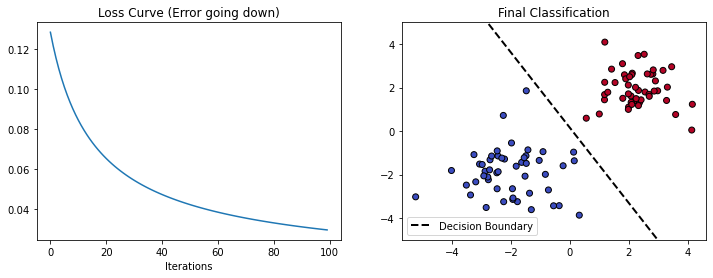

In [13]:
# 🔄 DEMO: Watching the Machine Learn
# Let's run your new functions in a loop to see the line move!

# 1. Data (2 clusters)
X_cls = np.r_[np.random.randn(50, 2) - 2, np.random.randn(50, 2) + 2]
y_cls = np.r_[np.zeros((50, 1)), np.ones((50, 1))]

# 2. Initialize Weights randomly
W = np.random.randn(2, 1)
b = 0.0
lr = 0.1

print("Training started...")
losses = []

# 3. Training Loop
for i in range(100):
    # Step 1: Get Gradients
    dW, db = compute_gradients(X_cls, y_cls, W, b)
    
    # Step 2: Update Weights
    W, b = update_parameters(W, b, dW, db, lr)
    
    # Calculate loss just for plotting
    y_prob = sigmoid(X_cls @ W + b)
    loss = -np.mean(y_cls * np.log(y_prob + 1e-9) + (1-y_cls) * np.log(1-y_prob + 1e-9))
    losses.append(loss)

print(f"Final Loss: {losses[-1]:.4f}")

# 4. Visualize
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(losses)
plt.title("Loss Curve (Error going down)")
plt.xlabel("Iterations")

plt.subplot(1, 2, 2)
plt.scatter(X_cls[:, 0], X_cls[:, 1], c=y_cls.ravel(), cmap='coolwarm', edgecolors='k')
# Plot decision boundary where Wx + b = 0 => x2 = -(w1*x1 + b)/w2
x1_vals = np.linspace(-4, 4, 10)
x2_vals = -(W[0]*x1_vals + b) / W[1]
plt.plot(x1_vals, x2_vals, 'k--', linewidth=2, label='Decision Boundary')
plt.title("Final Classification")
plt.legend()
plt.ylim(-5, 5)
plt.show()


# Part 4: Softmax (Multi-Class)

Finally, what if we have 10 classes (like MNIST digits 0-9)? 
Logistic Regression gives us one probability ($p$). Softmax gives us a list of probabilities ($p_1, p_2, ..., p_N$) that sum to 1.


## Question 7: Softmax

Convert raw scores (logits) into probabilities.

$$ \text{Softmax}(x)_i = \frac{e^{x_i}}{\sum e^{x_j}} $$

**Task:** Implement `softmax(x)`. 
*Tip: Subtract `np.max(x)` before exponentiating for numerical stability!*


In [14]:
def softmax(x):
    # BEGIN SOLUTION
    # Shift x for stability
    x_shifted = x - np.max(x)
    exps = np.exp(x_shifted)
    return exps / np.sum(exps)
    # END SOLUTION


## Question 8: Calculating Accuracy

In classification, we output probabilities (e.g., `[0.1, 0.8, 0.1]`). 
To make a final decision, we pick the index with the **highest** probability using `np.argmax`.

**Task:** Implement `get_accuracy(probs, labels)`.
1. Convert `probs` to class predictions (index of max value).
2. Compare with `labels`.
3. Return the percentage (0.0 to 1.0) that match.


In [15]:
def get_accuracy(probs, labels):
    # BEGIN SOLUTION
    predictions = np.argmax(probs, axis=1)
    return np.mean(predictions == labels)
    # END SOLUTION


In [16]:
grader.check("q8")

q8 results: All test cases passed!

Logits: [-2.   1.5  0.5]
Probs:  [0.02159923 0.71526828 0.26313249]
Robot says: 'It is a Dog!'


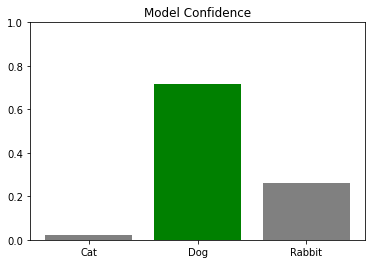

In [17]:
# 🏆 DEMO: The Final Score
# Let's see your Softmax and Accuracy in action.

logits = np.array([-2.0, 1.5, 0.5]) # Raw scores
probabilities = softmax(logits)     # Your function

classes = ['Cat', 'Dog', 'Rabbit']
prediction_index = np.argmax(probabilities)
predicted_class = classes[prediction_index]

print(f"Logits: {logits}")
print(f"Probs:  {probabilities}")
print(f"Robot says: 'It is a {predicted_class}!'")

plt.bar(classes, probabilities, color=['gray', 'green', 'gray'])
plt.title("Model Confidence")
plt.ylim(0, 1)
plt.show()


## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [ ]:
# Save your notebook first, then run this cell to export your submission.
grader.export(run_tests=True)